In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
import numpy as np


In [15]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/Assignment 3 /Flowers-Dataset/flowers')

Found 4327 images belonging to 5 classes.


In [16]:
# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/Assignment 3 /Flowers-Dataset/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4327 images belonging to 5 classes.


In [17]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

In [18]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
Flower_model.fit(Xtrain,steps_per_epoch= len (Xtrain),epochs= 8,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/8


InvalidArgumentError: ignored

In [20]:
Flower_model.save('Flower.h5')

In [21]:
from tensorflow.keras.preprocessing import image

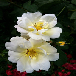

In [39]:
test_img=image.load_img('/content/drive/MyDrive/IBM PROJECT/Assignment 3 /Flowers-Dataset/flowers/rose/10090824183_d02c613f10_m.jpg',target_size=(76,76))
test_img

In [40]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]



1/1 [==============================] - 0s 32ms/step


'rose'

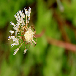

In [43]:
test_img1=image.load_img('/content/drive/MyDrive/IBM PROJECT/Assignment 3 /Flowers-Dataset/flowers/dandelion/10200780773_c6051a7d71_n.jpg',target_size=(76,76))
test_img1

In [44]:
x=image.img_to_array(test_img1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

1/1 [==============================] - 0s 28ms/step


'tulip'